# Music Data Analysis

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import functions as mb

import sqlite3
conn = sqlite3.connect('music_collection.db')
cursor = conn.cursor()

Now that we:
* Have all of our music in a database
* Have built some functions to query, insert, etc.

We can perform some exploratory data analysis.

First, let's look at the different albums we have from each decade:

Text(0.5, 0, 'Year')

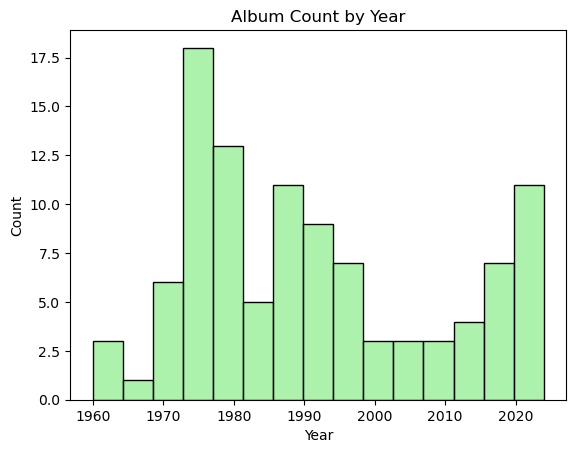

In [81]:
sixties = mb.formatted_album_between_years(1960, 1969)
seventies= mb.formatted_album_between_years(1970, 1979)
eighties= mb.formatted_album_between_years(1980, 1989)
nineties= mb.formatted_album_between_years(1990, 1999)
y_2000s= mb.formatted_album_between_years(2000, 2009)
y_2010s= mb.formatted_album_between_years(2010, 2019)
y_2020s= mb.formatted_album_between_years(2020, 2030)

decades = [sixties, seventies, eighties, nineties, y_2000s, y_2010s, y_2020s]
decade_name = ['sixties', 'seventies', 'eighties', 'nineties', 'y_2000s', 'y_2010s', 'y_2020s']
decade_names = ['sixties', 'seventies', 'eighties', 'nineties', 'y_2000s', 'y_2010s', 'y_2020s']

# Assign each decade to have its own dataframe, stored within the decade_names list
for i in range(len(decades)):
    decade_names[i] = pd.DataFrame(data=decades[i])

decade_names = [df.rename(columns={0: 'title', 1: 'artist', 2: 'year', 3: 'format'}) for df in decade_names]

albums = pd.concat(decade for decade in decade_names)

sns.histplot(data=albums, x='year', color='lightgreen', bins=15)
plt.title('Album Count by Year')
plt.xlabel('Year')

In [82]:
display(albums['year'].mode()); albums['year'].describe()

0    1978
Name: year, dtype: int64

count     104.000000
mean     1991.240385
std        17.540796
min      1960.000000
25%      1977.000000
50%      1988.000000
75%      2003.500000
max      2024.000000
Name: year, dtype: float64

The distribution above is not normal, but rather multimodal. We see our highest peak in the data approximately near the years 1975-1980, with the next highest peaks surfacing after 2020 and around in a cluster around 1990. This demonstrates that my taste frequents these three specific time periods, as opposed to generally being from some certain time period with variance on either side of that era. 

From our descriptive statistics we can also see the visualized skew of the years of our album, in that the mean album year (1991) is greater than the median album year (1988), which are both even greater than the mode of our distribution (1978). 

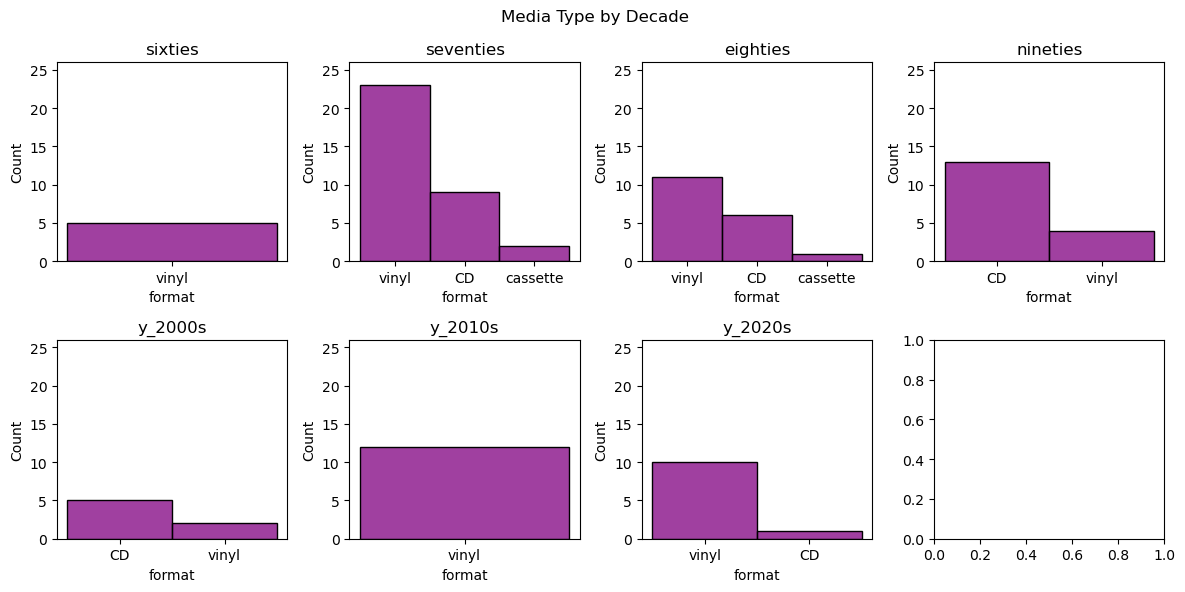

In [124]:
fig, ax = plt.subplots(2,4, figsize=(12,6))
for i in range(len(decade_names)):
    sns.histplot(data=decade_names[i], x='format', ax=ax.flat[i], color='purple')
    ax.flat[i].set_title(decade_name[i])
    ax.flat[i].set_ylim([0, 26])

fig.suptitle('Media Type by Decade')
plt.tight_layout()

Some interesting takeaways from the above visualizations are that:
* From the '60s and 2010s I only have vinyl media, and similarly from the '70s, '80s, and 2020s I have mostly the format of vinyl, though that is not the only format
* The few cassettes I have are from the '70s and '80s –– which makes sense considering they are relatively outdated technology
* Similarly, I mainly have CD's from the '90s and 2000s, which makes sense considering that is primarily the era of CDs


How many albums of each format type do I have?

In [84]:
albums.groupby(by='format').size()

format
CD          34
cassette     3
vinyl       67
dtype: int64

I have only 3 casettes, 34 CDs, and nearly double the amount of vinyl, at 67 albums. 